# Jupyter Data Science Workflow

### From exploratory analysis to reproducible science

* Source: [Reproducible Data Analysis in Jupyter](http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/)
* Credit: Jake VanderPlas, University of Washington eScience Institute

# Unsupervised Analysis of Days of Week

Treating crossings each day as features to learn about the relationships between various days

In [1]:
# Import the required libraries and set default settings

import pandas as pd
import matplotlib.pyplot as plt
from helpers.data import get_fremont_data
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
%matplotlib inline
plt.style.use('seaborn')

## Get Data

In [2]:
# Get the Fremont data and store it into a dataframe

fremont_df = get_fremont_data()

In [3]:
# Check the initial format of the data

fremont_df.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [4]:
# Check the shape of the data

fremont_df.shape

(138542, 3)

<AxesSubplot:xlabel='Date'>

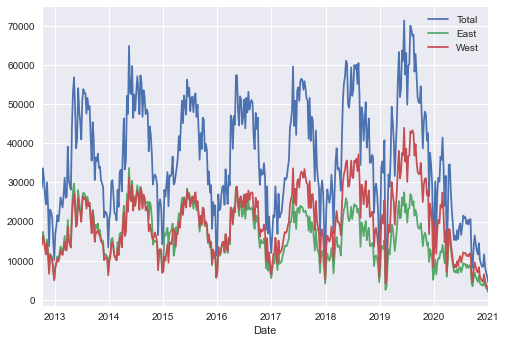

In [5]:
# Initial plot of the data - exploration frequency increase can be attributed to summertime


fremont_df.resample('W').sum().plot()

(0.0, 2520524.1)

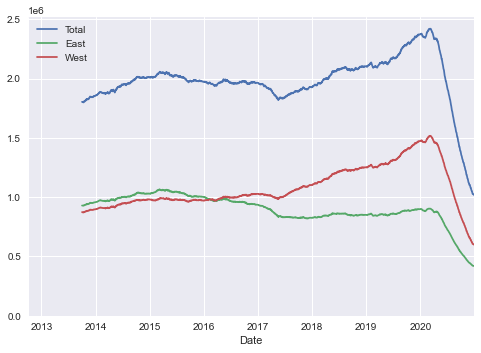

In [6]:
# Plot the annual trend

ax = fremont_df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

<AxesSubplot:xlabel='time'>

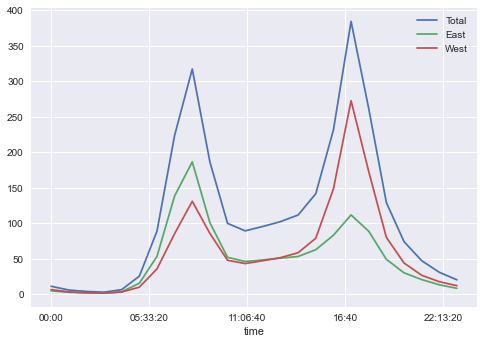

In [7]:
# Explore trends in a daily aspect - a typical commute pattern can be noticed

fremont_df.groupby(fremont_df.index.time).mean().plot()

<AxesSubplot:xlabel='time'>

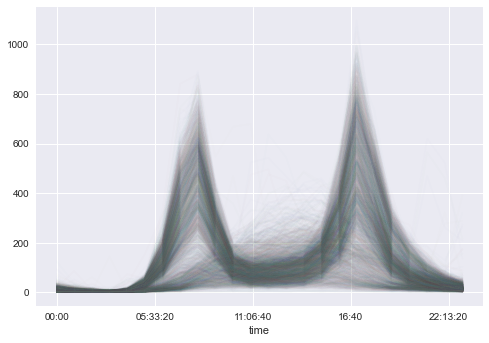

In [8]:
# Pivot the data - hour:date
# There is a noticeable separation in terms of days and two patterns can be observed - weekdays:weekends

pivoted_df = fremont_df.pivot_table('Total', index = fremont_df.index.time, columns = fremont_df.index.date)
pivoted_df.plot(legend = False, alpha = 0.01)

## Principal Component Analysis

In [9]:
# Transpose and clean the pivoted dataframe

X = pivoted_df.fillna(0).T.values
X.shape

(3012, 24)

In [10]:
#  Perform a PCA

X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(3012, 2)

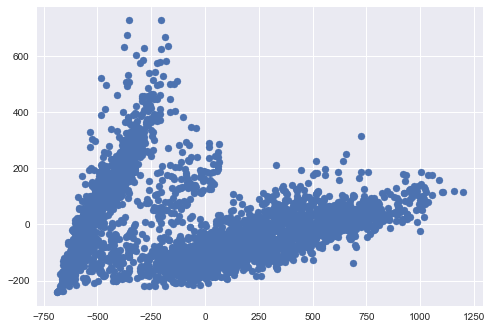

In [11]:
#  Plot the two dimensions of the PCA against each other

plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised Clustering

In [12]:
# Create a Gaussian Mixture Model

gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

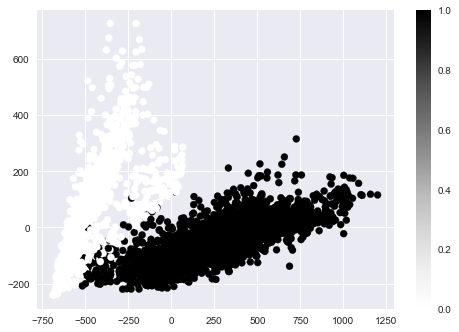

In [13]:
# Plot the PCA distribution again using the GMM color labels

plt.scatter(X2[:, 0], X2[:, 1], c=labels)
plt.colorbar()

<AxesSubplot:xlabel='time'>

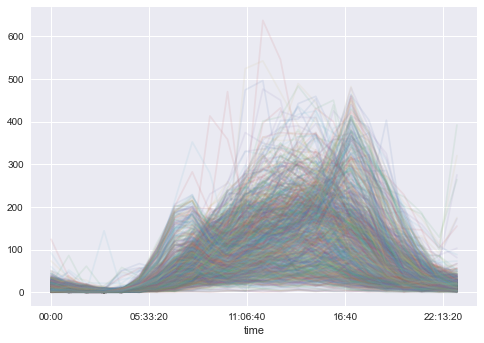

In [14]:
# After plotting the first cluster we can clearly see a normalized pattern (assumption is that those are the weekends)

pivoted_df.T[labels == 0].T.plot(legend=False, alpha=0.1)

<AxesSubplot:xlabel='time'>

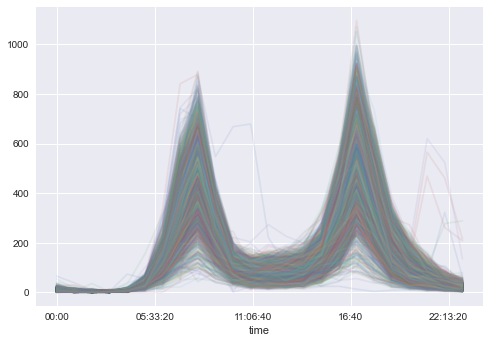

In [15]:
# Plotting the second cluster reveals a distinctive commuter pattern (the assumption here is that those are the weekdays)

pivoted_df.T[labels == 1].T.plot(legend=False, alpha=0.1)

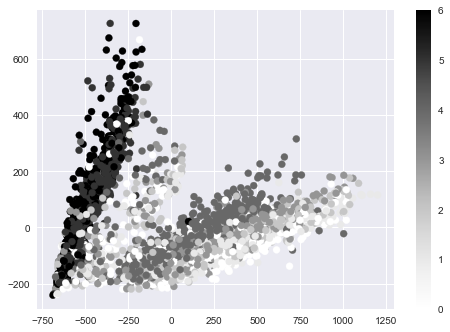

In [16]:
# Further exploration of the distribution of days of the week

dayofweek_df = pd.DatetimeIndex(pivoted_df.columns).dayofweek
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek_df)
plt.colorbar()

## Analyzing outliers

The following points are weekdays with a holiday-like pattern

In [17]:
# Weekdays that fall within the weekend cluster pattern (assumption is that those are public holidays)

dates = pd.DatetimeIndex(pivoted_df.columns)
dates[(labels == 0) & (dayofweek_df < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2012-12-31', '2013-01-01', '2013-05-27', '2013-07-04',
               '2013-07-05', '2013-09-02',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=274, freq=None)